In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import learning_curve

import warnings
# Code was showing some warnings, from stack overflow optimal answer was to include this
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
df= pd.read_csv("fetal_health.csv")
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values



In [3]:
loo = LeaveOneOut()
loo_scores = [] 

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import LeaveOneOut
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt

for train_index, test_index in loo.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

gradient_boosting = GradientBoostingClassifier()
gradient_boosting.fit(X_train, y_train)
y_pred = gradient_boosting.predict(X_test)

loo_scores.append(y_pred[0] == y_test[0])


# Print accuracy
accuracy = accuracy_score(y, gradient_boosting.predict(X))

precision = precision_score(y, gradient_boosting.predict(X), average='micro')
recall = recall_score(y, gradient_boosting.predict(X), average='micro')
f1 = f1_score(y, gradient_boosting.predict(X), average='micro')
print("Leave-One-Out CV Accuracy:", accuracy * 100, "%")

print("Precision (Micro) =", precision)
print("Recall (Micro) =", recall)
print("F1-score (Micro) =", f1)

print("*******************")

conf_matrix = confusion_matrix(y, gradient_boosting.predict(X))
print("Confusion Matrix:")
print(conf_matrix)
print("*******************")
class_report = classification_report(y, gradient_boosting.predict(X))
print("Classification Report:")
print(class_report)




Leave-One-Out CV Accuracy: 98.96519285042334 %
Precision (Micro) = 0.9896519285042333
Recall (Micro) = 0.9896519285042333
F1-score (Micro) = 0.9896519285042333
*******************
Confusion Matrix:
[[1648    7    0]
 [  12  283    0]
 [   1    2  173]]
*******************
Classification Report:
              precision    recall  f1-score   support

         1.0       0.99      1.00      0.99      1655
         2.0       0.97      0.96      0.96       295
         3.0       1.00      0.98      0.99       176

    accuracy                           0.99      2126
   macro avg       0.99      0.98      0.98      2126
weighted avg       0.99      0.99      0.99      2126



In [5]:
# data set had negative value, using log transform to make positive and Adding 1 in X, to prevent log value as infinite
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X_log_transformed = np.log1p(X + 1)

kbest = SelectKBest(score_func=chi2, k=5)
X_new = kbest.fit_transform(X_log_transformed, y)

feature_scores = kbest.scores_
print("Feature Importance Scores:")
print(feature_scores)

Feature Importance Scores:
[2.61919200e-01 1.77368755e-03 1.52940324e-02 5.36050691e-04
 3.95730127e-04 6.56463269e-08 8.59609816e-05 1.68957195e+01
 1.45339333e+01 5.29494011e+02 4.23579355e+01 1.72531418e+01
 3.22287127e+00 1.27957858e-02 5.13797999e+00 5.46795895e-01
 1.72059243e+00 1.58334943e+00 1.05026330e+00 1.21194002e+02
 1.18517227e+01]


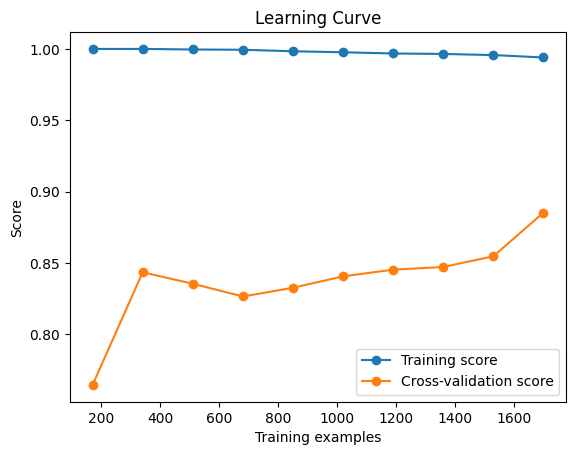

In [6]:
train_sizes, train_scores, test_scores = learning_curve(gradient_boosting, X, y, cv=5, train_sizes=np.linspace(0.1, 1.0, 10))

plt.figure()
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', label="Training score")
plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', label="Cross-validation score")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.title("Learning Curve")
plt.legend(loc="best")
plt.show()